#    Team 2

1. Yash Govil - JL20FS050
2. Manoj Verma - JL20FS022
3. Rakhi Gupta - JL20FS032
4. Sandipan Bhur - JL20PG112

# Topic

Problem Statement of Project - 

Sentimental analysis like psychological disfunctions(example: depression, anxiety, suicidal attempts, long covid) of Covid 

tweets in Wave 1, Wave 2 and Wave 3 and its depression level/pink slip.





# Import of libraries

Tweepy - Tweepy is used in Twitter API to extract the tweets from the tweeter

OAuthHandler - OAuth is an open-standard framework and it is used to authorize client applications to access online resources

API - Tweepy is a package through which you get a convenient access in getting the verified credentials of the user through 
Twitter API




Please note:

We have deliberately used Covid based user id "LongCovidAdvoc" through which we can get the access of the tweets and analyse the sentimental analysis of the depression



In [246]:
import tweepy
from tweepy import OAuthHandler
from tweepy import API
import pandas as pd

consumer_key = "tBF7SX0wuBPLbZUfsuVchM2QH"
consumer_secret = "dBcQuwXYjehgpps5yyuPYmKdqTj4CexmwZL41VbUbDUMDQxzxS"
access_token = "1245459608-hX8dRJsre6zRv5PvjjFKAJlj1kPtsAkUaktKYjC"
access_secret = "oJtEklsK8Li9MFANp2a5hrfFBw6UAXTbonfRVnED6f3ue"

# Consumer key authentication
auth = OAuthHandler(consumer_key, consumer_secret)
# Access key authentication
auth.set_access_token(access_token, access_secret)
# Set up the API with the authentication handler
api = API(auth)
user_id = "LongCovidAdvoc"

# Twitter Cursor Method

Through Cursor method in Tweepy we are iterating the number of tweets that it will generate from user_id = "LongCovidAdvoc". We are passing parameters like user_timeline, user_id, since_id, max_id, trim_user, exclude_replies, etc.)

In [58]:
tweets = tweepy.Cursor(api.user_timeline, 
                        screen_name=user_id, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        lang="en").items(100);

# Looping through each tweets in the user id and extracting the text from the tweet and the date at which the tweet has been generated

In [59]:
# Looping through each tweets in the user id and extracting the text from the tweet and the date and which the tweet has been extracted
tweet_data = [[tweet.text,tweet.created_at] for tweet in tweets]

Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang


# Converting the whole text data and the date of the tweets into a dataframe through pandas package

In [60]:
tweet_df = pd.DataFrame(data=tweet_data,columns=['text','date'])

In [61]:
tweet_df

,text,date
0,A £100 million ask for #LongCovid research fro...,2022-04-27 11:33:28+00:00
1,RT @PaulBrandITV: BREAKING: High Court has rul...,2022-04-27 10:47:36+00:00
2,RT @IndependentSage: 🚨 This week we are going ...,2022-04-27 10:47:14+00:00
3,RT @EnemyInAState: 1/Whilst the UK ponders the...,2022-04-27 09:02:19+00:00
4,RT @olga_basso: 1\nWelcome to our latest COVID...,2022-04-27 08:33:08+00:00
...,...,...
95,Agree with Leonard - RCTs for #Paxlovid4LongCo...,2022-04-18 15:08:13+00:00
96,RT @headdock: https://t.co/jqJMXe1va1 Perhaps...,2022-04-18 14:53:53+00:00
97,"RT @itsbodypolitic: Next week! Monday, April 1...",2022-04-18 14:41:46+00:00
98,That's a good quality HEPA filter &amp; quite ...,2022-04-18 14:39:29+00:00


# Converting the whole dataframe to a csv format 

Name of the csv format file is Covid_tweets.csv

In [6]:
tweet_df.to_csv("Covid_tweets.csv")

# api.home_timeline

The home_timeline method of api class gives an edge to retrive the most recent_statuses, tweets, retweets which are posted by the user. 

In [62]:
public_tweets = api.home_timeline()

# Looping through each tweet in the home timeline of the user and extracting the text of the tweet and displaying it

In [63]:
for tweet in public_tweets:
    print(tweet.text)

Overall nifty is moving towards praedico short term target of 16500. Once 16800 is broken one can see big selling p… https://t.co/2nEKrCj8Uu
Nifty may try to bounce to levels of 17100-150 intraday but may see resistance at these levels  Nifty on the downsi… https://t.co/OShsAyxiFH
As we told yesterday that nifty would be buy is it closes above 17200. Though nifty is showing close exactly at 172… https://t.co/QEjNST7Xq9
Nifty may open in the range of 17100-150. Nifty may try to go up but it it may face resistance in the zone of 17150… https://t.co/F9OrsEKRy9
😂 This is too cool! 😂😂😂♥️ https://t.co/lfdSICd5zn
RT @ShipraJoshi12: Kind words of appreciation by Ajay sir  for @shreyaghoshal
Here he appreciates her by calling her their close friend and…
But from our previous posts we have been mentioning that targets of 16500 on nifty in short term trend are opened .… https://t.co/EzjpMK2Lvn
Nifty may open in the range of 16950-17000. Nifty maybe test levels of 17000 and may find support in The

# Clean-text package

Clean-text package is used to clean the emoji's which are contained in the text

In [64]:
!pip install clean-text

In [65]:
#Cleaning the emoji
from cleantext import clean

# Regex Expression - Regex Expression is used in this context to clean the 
# tweets

In the text there were url's, mentions, hashtags. Without cleaning machines won't be able to understand the human language can cannot be able to interpret it. So cleaning of text has a very significance role of pre-processing the raw text effectively.

In [66]:
import re
def cleanUpTweet(txt):
    #Removing the mentions
    txt = re.sub(r'@[A-Za-z0-9_]+','',txt)
    #removing the hashtags
    txt = re.sub(r'#','',txt)
    #Removing RT
    txt = re.sub(r'RT :','',txt)
    #Removing the url's
    txt = re.sub(r'https?:\/[A-Za-z0-9\.\/]+', '',txt)
    #txt = re.sub(r'[^a-zA-Z]+','',txt)
    #Removing the emoji's
    txt = clean(txt, no_emoji=True)
    txt = txt.replace('"','')
    return txt

Calling the function cleanUpTweet using apply method and storing the updated cleaned text into the same dataframe

In [67]:
tweet_df['text'] = tweet_df['text'].apply(cleanUpTweet)

In [68]:
tweet_df

,text,date
0,a ps100 million ask for longcovid research fro...,2022-04-27 11:33:28+00:00
1,breaking: high court has ruled that the govern...,2022-04-27 10:47:36+00:00
2,this week we are going to discuss covid survei...,2022-04-27 10:47:14+00:00
3,1/whilst the uk ponders the 'mystery' of hepat...,2022-04-27 09:02:19+00:00
4,1\nwelcome to our latest covid update. we are ...,2022-04-27 08:33:08+00:00
...,...,...
95,agree with leonard - rcts for paxlovid4longcov...,2022-04-18 15:08:13+00:00
96,perhaps the best paper i've ever read on the m...,2022-04-18 14:53:53+00:00
97,"next week! monday, april 18, 3:00pm-4:30pm est...",2022-04-18 14:41:46+00:00
98,that's a good quality hepa filter & quite a fe...,2022-04-18 14:39:29+00:00


In [69]:
tweet_df.to_csv("Covid_tweets.csv")

# TextBlob 

Text Blob is a special package in NLP which provides a simple API for common natural language processing tasks such as sentimental analysis, parts of speech tagging , noun phase extraction and many more. 

Over here we have used text blob to calculate the sentiments of tweets on the basis of subjectivity and polarity

In [76]:
!pip install TextBlob

# Importing the TextBlob library

In [70]:
from textblob import TextBlob

# Subjectivity

TextBlob calculates subjectivity by looking at the intensity of the text. Subjectivity basically tells the personal opinion and also its factual information that contained in the text. 

In [71]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

# Polarity

Polarity gives two output in the text and their output lies between -1 and 1 where -1 refers to the negative sentiment and +1 means positive sentiment

In [72]:
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

Calling the function getTextSubjectivity using apply method and storing the updated cleaned text into the same dataframe but in another column which is 'Subjectivity'

In [73]:
tweet_df['Subjectivity'] = tweet_df['text'].apply(getTextSubjectivity)

Calling the function getTextPolarity using apply method and storing the updated cleaned text into the same dataframe but in another column which is 'Polarity'

In [74]:
tweet_df['Polarity'] = tweet_df['text'].apply(getTextPolarity)

In [75]:
tweet_df

,text,date,Subjectivity,Polarity
0,a ps100 million ask for longcovid research fro...,2022-04-27 11:33:28+00:00,0.900000,0.300000
1,breaking: high court has ruled that the govern...,2022-04-27 10:47:36+00:00,0.540000,0.160000
2,this week we are going to discuss covid survei...,2022-04-27 10:47:14+00:00,0.000000,0.000000
3,1/whilst the uk ponders the 'mystery' of hepat...,2022-04-27 09:02:19+00:00,0.651515,0.245455
4,1\nwelcome to our latest covid update. we are ...,2022-04-27 08:33:08+00:00,0.933333,0.600000
...,...,...,...,...
95,agree with leonard - rcts for paxlovid4longcov...,2022-04-18 15:08:13+00:00,0.300000,0.000000
96,perhaps the best paper i've ever read on the m...,2022-04-18 14:53:53+00:00,0.300000,1.000000
97,"next week! monday, april 18, 3:00pm-4:30pm est...",2022-04-18 14:41:46+00:00,0.250000,0.068182
98,that's a good quality hepa filter & quite a fe...,2022-04-18 14:39:29+00:00,0.310000,0.115000


# Defining a function analysis

This function main objective is to check whether the score is less than 0, equals to 0, or greater than 0. If it is less than 0 it is "Negative". If it is equals to 0 it is "Neutral". If it is greater than 0 it is "Positive". This condition will be for both the cases "Subjectivity" column as well as for the "Polarity" column

In [76]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"


Calling the function analysis using apply method and storing the nature of the sentiment into the same dataframe but in another column which is 'Analysis Polarity"

In [77]:
tweet_df["Analysis_Polarity"] = tweet_df["Polarity"].apply(analysis)

Calling the function analysis using apply method and storing the nature of the sentiment into the same dataframe but in another column which is 'Analysis Subjectivity"

In [78]:
tweet_df["Analysis_Subjectivity"] = tweet_df["Subjectivity"].apply(analysis)

In [79]:
tweet_df

,text,date,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,a ps100 million ask for longcovid research fro...,2022-04-27 11:33:28+00:00,0.900000,0.300000,Positive,Positive
1,breaking: high court has ruled that the govern...,2022-04-27 10:47:36+00:00,0.540000,0.160000,Positive,Positive
2,this week we are going to discuss covid survei...,2022-04-27 10:47:14+00:00,0.000000,0.000000,Neutral,Neutral
3,1/whilst the uk ponders the 'mystery' of hepat...,2022-04-27 09:02:19+00:00,0.651515,0.245455,Positive,Positive
4,1\nwelcome to our latest covid update. we are ...,2022-04-27 08:33:08+00:00,0.933333,0.600000,Positive,Positive
...,...,...,...,...,...,...
95,agree with leonard - rcts for paxlovid4longcov...,2022-04-18 15:08:13+00:00,0.300000,0.000000,Neutral,Positive
96,perhaps the best paper i've ever read on the m...,2022-04-18 14:53:53+00:00,0.300000,1.000000,Positive,Positive
97,"next week! monday, april 18, 3:00pm-4:30pm est...",2022-04-18 14:41:46+00:00,0.250000,0.068182,Positive,Positive
98,that's a good quality hepa filter & quite a fe...,2022-04-18 14:39:29+00:00,0.310000,0.115000,Positive,Positive


# Percentage of tweets

Calculated how many percentage of tweets are positive, how many tweets are negative, and how many tweets are neutral.

Interpretation:

We observed that 53% of tweets are positive, 27% are negative, 20% are neutral. 

Postive Tweets Interpretation - We can say that out of 100 tweets there are around 53 tweets which shows positive sentiment which means that the depression level is low for these set of tweets. We can say that psychological disfunctions are very pretty low during the pandemic for these set of tweets. People didn't experienced any health crisis or any other consequences.

Negative Tweets Interpretation - We can say that out of 100 tweets there are around 27 tweets which shows negative sentiment i.e it means that the depression level is at the mid stage for these set of tweets. There are people out there who has experienced severe unemployment which has caused a severe hardship in their lives. Many people has been removed out from their jobs as their business were going at a loss. Due to this the economy has went down and many women and youth-workers has been worst hit.

Neutral Tweets Interpretation - We can say that out of 100 tweets there are around 20 tweets which shows neutral sentiment which means that the depression level is neither too positive nor too negative. It lies at a mid point in a balanced scale. 

In [80]:
def percentage_of_tweets(per):
    positive = 0
    negative = 0
    neutral = 0
    for each in per:
        if each == "Positive":
            positive +=1
        elif each == "Neutral":
            neutral += 1
        else:
            negative += 1
    print(positive , "% of positive tweets")
    print(neutral , "% of neutral tweets" )
    print(negative , "% of negative tweets")

In [81]:
percentage_of_tweets(tweet_df["Analysis_Polarity"])

53 % of positive tweets
27 % of neutral tweets
20 % of negative tweets


In [82]:
tweet_df.to_csv("Analysis_CovidSentimental.csv")

In [83]:
!pip install wordcloud-1.8.1-cp39-cp39-win_amd64.whl

Processing c:\users\dell\wordcloud-1.8.1-cp39-cp39-win_amd64.whl
wordcloud is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


# Importing word cloud and stopwords

WordCloud - It is a visual representation of words. It basically highlights the popular words and the phrases based on the frequency of the usage.

Stopwords - Stopwords are those words which appear frequently in the english language like "the", "a","an" etc.

In [84]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Analysis_CovidSentimental.csv")


In [85]:
df.drop(["Unnamed: 0"], axis=1)

,text,date,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,a ps100 million ask for longcovid research fro...,2022-04-27 11:33:28+00:00,0.900000,0.300000,Positive,Positive
1,breaking: high court has ruled that the govern...,2022-04-27 10:47:36+00:00,0.540000,0.160000,Positive,Positive
2,this week we are going to discuss covid survei...,2022-04-27 10:47:14+00:00,0.000000,0.000000,Neutral,Neutral
3,1/whilst the uk ponders the 'mystery' of hepat...,2022-04-27 09:02:19+00:00,0.651515,0.245455,Positive,Positive
4,1\nwelcome to our latest covid update. we are ...,2022-04-27 08:33:08+00:00,0.933333,0.600000,Positive,Positive
...,...,...,...,...,...,...
95,agree with leonard - rcts for paxlovid4longcov...,2022-04-18 15:08:13+00:00,0.300000,0.000000,Neutral,Positive
96,perhaps the best paper i've ever read on the m...,2022-04-18 14:53:53+00:00,0.300000,1.000000,Positive,Positive
97,"next week! monday, april 18, 3:00pm-4:30pm est...",2022-04-18 14:41:46+00:00,0.250000,0.068182,Positive,Positive
98,that's a good quality hepa filter & quite a fe...,2022-04-18 14:39:29+00:00,0.310000,0.115000,Positive,Positive


In [86]:
comment_words = ''
stopwords = set(STOPWORDS)

Extracting each text from each row in the "Tweet" column and finding the highest frequency of the words in the sentence and converting those highest frequency words in a WordCloud format. 

In [87]:
for val in tweet_df.text:
    #converting each text in Tweet column into a str format.
    val = str(val)
    #Splitting each text in Tweet column using a split method.
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    #print(tokens)
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
#print(comment_words)

Representing the highest frequency of words in the form of WordCloud

Interpretation

We observe in WordCloud that long covid is the most appeared word in the Tweet column, followed by treatment, research , mecfs, viral and so many.

As long covid is the most appeared word in the Tweet column we can say that there are many people out there who are suffering from this symptoms during the end of Wave 1 and Wave 2. People are continuing to experience this symptoms for longer than usual after contracting the SARS -Cov2 virus. This long covid start growing to people during the Wave 2 scenario and its symptoms are extremely harmful. This is why long covid is the most frequently used word in the wordCloud

The second most appeared word is the cfs. The acronym for CFS is chronic fatigue syndrome. It is a fatigue that last for 6 months and it worsens the condition of a human being. 

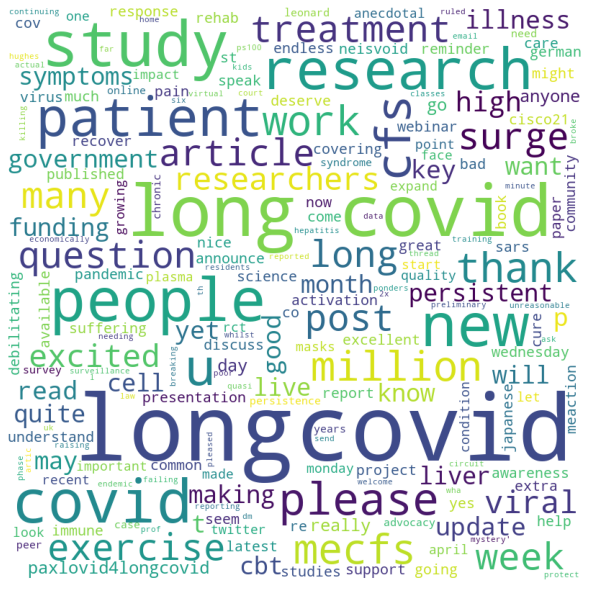

In [88]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

NLTK - It is a platform through which we used to build applications in Python by collaborating with human language data for applying statistical NLP problems

word_tokenize - Word_tokenize is used to split the sentences into a group of tokens.

In [89]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [90]:
df.dropna()

,Unnamed: 0,text,date,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,a ps100 million ask for longcovid research fro...,2022-04-27 11:33:28+00:00,0.900000,0.300000,Positive,Positive
1,1,breaking: high court has ruled that the govern...,2022-04-27 10:47:36+00:00,0.540000,0.160000,Positive,Positive
2,2,this week we are going to discuss covid survei...,2022-04-27 10:47:14+00:00,0.000000,0.000000,Neutral,Neutral
3,3,1/whilst the uk ponders the 'mystery' of hepat...,2022-04-27 09:02:19+00:00,0.651515,0.245455,Positive,Positive
4,4,1\nwelcome to our latest covid update. we are ...,2022-04-27 08:33:08+00:00,0.933333,0.600000,Positive,Positive
...,...,...,...,...,...,...,...
95,95,agree with leonard - rcts for paxlovid4longcov...,2022-04-18 15:08:13+00:00,0.300000,0.000000,Neutral,Positive
96,96,perhaps the best paper i've ever read on the m...,2022-04-18 14:53:53+00:00,0.300000,1.000000,Positive,Positive
97,97,"next week! monday, april 18, 3:00pm-4:30pm est...",2022-04-18 14:41:46+00:00,0.250000,0.068182,Positive,Positive
98,98,that's a good quality hepa filter & quite a fe...,2022-04-18 14:39:29+00:00,0.310000,0.115000,Positive,Positive


In [91]:
df2 = df.dropna()
df2

,Unnamed: 0,text,date,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,a ps100 million ask for longcovid research fro...,2022-04-27 11:33:28+00:00,0.900000,0.300000,Positive,Positive
1,1,breaking: high court has ruled that the govern...,2022-04-27 10:47:36+00:00,0.540000,0.160000,Positive,Positive
2,2,this week we are going to discuss covid survei...,2022-04-27 10:47:14+00:00,0.000000,0.000000,Neutral,Neutral
3,3,1/whilst the uk ponders the 'mystery' of hepat...,2022-04-27 09:02:19+00:00,0.651515,0.245455,Positive,Positive
4,4,1\nwelcome to our latest covid update. we are ...,2022-04-27 08:33:08+00:00,0.933333,0.600000,Positive,Positive
...,...,...,...,...,...,...,...
95,95,agree with leonard - rcts for paxlovid4longcov...,2022-04-18 15:08:13+00:00,0.300000,0.000000,Neutral,Positive
96,96,perhaps the best paper i've ever read on the m...,2022-04-18 14:53:53+00:00,0.300000,1.000000,Positive,Positive
97,97,"next week! monday, april 18, 3:00pm-4:30pm est...",2022-04-18 14:41:46+00:00,0.250000,0.068182,Positive,Positive
98,98,that's a good quality hepa filter & quite a fe...,2022-04-18 14:39:29+00:00,0.310000,0.115000,Positive,Positive


# POS Tagging

Through POS Tagging in NLTK it iterates each tweet from the text column and generating the parts of speech tagging for each word in a sentence. Before generating POS for each text it tokenize the sentence into words using word_tokenize which is a package under NLP.

In [92]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(textt):
    tags = pos_tag(word_tokenize(textt))
    print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df2['POS_tagged'] = df2["text"].apply(token_stop_pos)
df2.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('a', 'DT'), ('ps100', 'NN'), ('million', 'CD'), ('ask', 'NN'), ('for', 'IN'), ('longcovid', 'JJ'), ('research', 'NN'), ('from', 'IN'), ('the', 'DT'), ('does', 'VBZ'), ("n't", 'RB'), ('seem', 'VB'), ('economically', 'RB'), ('unreasonable', 'JJ'), ('...', ':')]
[('breaking', 'NN'), (':', ':'), ('high', 'JJ'), ('court', 'NN'), ('has', 'VBZ'), ('ruled', 'VBN'), ('that', 'IN'), ('the', 'DT'), ('government', 'NN'), ('broke', 'VBD'), ('the', 'DT'), ('law', 'NN'), ('by', 'IN'), ('failing', 'VBG'), ('to', 'TO'), ('protect', 'VB'), ('care', 'NN'), ('home', 'NN'), ('residents', 'NNS'), ('from', 'IN'), ('covid-19', 'NN'), ('...', ':')]
[('this', 'DT'), ('week', 'NN'), ('we', 'PRP'), ('are', 'VBP'), ('going', 'VBG'), ('to', 'TO'), ('discuss', 'VB'), ('covid', 'JJ'), ('surveillance', 'NN'), ('.', '.'), ('send', 'VB'), ('us', 'PRP'), ('your', 'PRP$'), ('questions', 'NNS'), ('on', 'IN'), ('dm', 'NN'), ('or', 'CC'), ('email', 'VB'), ('it', 'PRP'), ('to', 'TO'), ('us', 'PRP'), ('on', 'IN'), ('question

[('new', 'JJ'), ('blog', 'NN'), ('post', 'NN'), ('by', 'IN'), ('on', 'IN'), ('the', 'DT'), ('cisco21', 'NN'), ('longcovid', 'NN'), ('glasgow', 'NN'), ('study', 'NN'), ('.', '.'), ('importantly', 'RB'), ('highlighting', 'VBG'), ('the', 'DT'), ('omission', 'NN'), ('of', 'IN'), ('...', ':')]
[('the', 'DT'), ('meaction', 'NN'), ('storytelling', 'VBG'), ('to', 'TO'), ('motivate', 'VB'), ('action', 'NN'), ('workshop', 'NN'), ('is', 'VBZ'), ('tomorrow', 'NN'), (',', ','), ('4/24', 'CD'), ('at', 'IN'), ('12pt', 'CD'), ('/', '$'), ('3et', 'CD'), ('/', '$'), ('8pm', 'CD'), ('bst', 'NN'), ('.', '.'), ('more', 'RBR'), ('info', 'JJ'), ('below', 'IN'), ('.', '.'), ('co', 'NN'), ('...', ':')]
[('the', 'DT'), ('number', 'NN'), ('of', 'IN'), ('stories', 'NNS'), ('re', 'VBP'), ('liver', 'JJ'), ('connections', 'NNS'), ('is', 'VBZ'), ('quite', 'RB'), ('extraordinary', 'JJ'), ('.', '.'), ('new', 'JJ'), ('test', 'NN'), ('are', 'VBP'), ('available', 'JJ'), ('7t', 'CD'), ('an', 'DT'), ('...', ':')]
[('multina

[('do', 'VB'), ('some', 'DT'), ('online', 'NN'), ('gaming', 'VBG'), ('for', 'IN'), ('a', 'DT'), ('bit', 'NN'), ('of', 'IN'), ('a', 'DT'), ('break', 'NN'), ('from', 'IN'), ('advocacy', 'NN'), (',', ','), ('long', 'RB'), ('covid', 'NN'), ('&', 'CC'), ('the', 'DT'), ('world', 'NN'), ('in', 'IN'), ('general', 'JJ'), ('.', '.'), ('until', 'IN'), ('someone', 'NN'), ('starts', 'VBZ'), ('t', 'NN'), ('...', ':')]
[('hey', 'NN'), (',', ','), ('all', 'DT'), ('!', '.'), ('this', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('really', 'RB'), ('valuable', 'JJ'), ('opportunity', 'NN'), ('for', 'IN'), ('all', 'DT'), ('in', 'IN'), ('the', 'DT'), ('neisvoid', 'NN'), ('interested', 'JJ'), ('in', 'IN'), ('advocacy', 'NN'), ('.', '.'), ('1', 'CD'), (')', ')'), ('sign', 'NN'), ('up', 'RP'), ('for', 'IN'), ('kinema', 'NN'), ('...', ':')]
[('last', 'JJ'), ('day', 'NN'), ('of', 'IN'), ('survey', 'NN'), ('in', 'IN'), ('case', 'NN'), ('anyone', 'NN'), ('has', 'VBZ'), ("n't", 'RB'), ('voted', 'VBN')]
[('note', 'NN'), ('for

C:\Users\Dell\AppData\Local\Temp/ipykernel_9740/4203591764.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['POS_tagged'] = df2["text"].apply(token_stop_pos)


,Unnamed: 0,text,date,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,POS_tagged
0,0,a ps100 million ask for longcovid research fro...,2022-04-27 11:33:28+00:00,0.900000,0.300000,Positive,Positive,"[(ps100, n), (million, None), (ask, n), (longc..."
1,1,breaking: high court has ruled that the govern...,2022-04-27 10:47:36+00:00,0.540000,0.160000,Positive,Positive,"[(breaking, n), (:, None), (high, a), (court, ..."
2,2,this week we are going to discuss covid survei...,2022-04-27 10:47:14+00:00,0.000000,0.000000,Neutral,Neutral,"[(week, n), (going, v), (discuss, v), (covid, ..."
3,3,1/whilst the uk ponders the 'mystery' of hepat...,2022-04-27 09:02:19+00:00,0.651515,0.245455,Positive,Positive,"[(1/whilst, None), (uk, a), (ponders, n), ('my..."
4,4,1\nwelcome to our latest covid update. we are ...,2022-04-27 08:33:08+00:00,0.933333,0.600000,Positive,Positive,"[(1, None), (welcome, n), (latest, a), (covid,..."


# Lemmatizer

Through Lemmatizer it is basically grouping the inflected words together and can be analysed as a single word. It is basically taking all the words from the POS_tagged column and converting it into its root form or called the lemma.

Now we are using the package WordNetLemmatizer and creating an instance of WordNetLemmatizer

In [93]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [94]:
wordnet_lemmatizer

<WordNetLemmatizer>

In [95]:
df2

,Unnamed: 0,text,date,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,POS_tagged
0,0,a ps100 million ask for longcovid research fro...,2022-04-27 11:33:28+00:00,0.900000,0.300000,Positive,Positive,"[(ps100, n), (million, None), (ask, n), (longc..."
1,1,breaking: high court has ruled that the govern...,2022-04-27 10:47:36+00:00,0.540000,0.160000,Positive,Positive,"[(breaking, n), (:, None), (high, a), (court, ..."
2,2,this week we are going to discuss covid survei...,2022-04-27 10:47:14+00:00,0.000000,0.000000,Neutral,Neutral,"[(week, n), (going, v), (discuss, v), (covid, ..."
3,3,1/whilst the uk ponders the 'mystery' of hepat...,2022-04-27 09:02:19+00:00,0.651515,0.245455,Positive,Positive,"[(1/whilst, None), (uk, a), (ponders, n), ('my..."
4,4,1\nwelcome to our latest covid update. we are ...,2022-04-27 08:33:08+00:00,0.933333,0.600000,Positive,Positive,"[(1, None), (welcome, n), (latest, a), (covid,..."
...,...,...,...,...,...,...,...,...
95,95,agree with leonard - rcts for paxlovid4longcov...,2022-04-18 15:08:13+00:00,0.300000,0.000000,Neutral,Positive,"[(agree, n), (leonard, a), (-, None), (rcts, n..."
96,96,perhaps the best paper i've ever read on the m...,2022-04-18 14:53:53+00:00,0.300000,1.000000,Positive,Positive,"[(perhaps, r), (best, a), (paper, n), ('ve, v)..."
97,97,"next week! monday, april 18, 3:00pm-4:30pm est...",2022-04-18 14:41:46+00:00,0.250000,0.068182,Positive,Positive,"[(next, a), (week, n), (!, None), (monday, n),..."
98,98,that's a good quality hepa filter & quite a fe...,2022-04-18 14:39:29+00:00,0.310000,0.115000,Positive,Positive,"[('s, v), (good, a), (quality, n), (hepa, n), ..."


# Lemmatize function

Defining a function lemmatize and iterating each word from the POS_tagged column and converting it into its root form or lemma. if there are no POS for a word then that word will be its lemma form.

In [96]:
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df2['Lemma'] = df2['POS_tagged'].apply(lemmatize)
df2.head()
            

C:\Users\Dell\AppData\Local\Temp/ipykernel_9740/3202885906.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Lemma'] = df2['POS_tagged'].apply(lemmatize)


,Unnamed: 0,text,date,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,POS_tagged,Lemma
0,0,a ps100 million ask for longcovid research fro...,2022-04-27 11:33:28+00:00,0.900000,0.300000,Positive,Positive,"[(ps100, n), (million, None), (ask, n), (longc...",ps100 million ask longcovid research n't see...
1,1,breaking: high court has ruled that the govern...,2022-04-27 10:47:36+00:00,0.540000,0.160000,Positive,Positive,"[(breaking, n), (:, None), (high, a), (court, ...",breaking : high court rule government break ...
2,2,this week we are going to discuss covid survei...,2022-04-27 10:47:14+00:00,0.000000,0.000000,Neutral,Neutral,"[(week, n), (going, v), (discuss, v), (covid, ...",week go discuss covid surveillance . send us...
3,3,1/whilst the uk ponders the 'mystery' of hepat...,2022-04-27 09:02:19+00:00,0.651515,0.245455,Positive,Positive,"[(1/whilst, None), (uk, a), (ponders, n), ('my...",1/whilst uk ponders 'mystery ' hepatitis sur...
4,4,1\nwelcome to our latest covid update. we are ...,2022-04-27 08:33:08+00:00,0.933333,0.600000,Positive,Positive,"[(1, None), (welcome, n), (latest, a), (covid,...",1 welcome late covid update . pleased announ...


Through TextBlob package we are calculating the sentimental score of Lemma both for subjectivity and for polarity.

In [97]:
from textblob import TextBlob

def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity


In [98]:
new_data = pd.DataFrame(df2[['text','Lemma']])

In [99]:
new_data['Polarity'] = new_data['Lemma'].apply(getPolarity)

In [100]:
new_data['Subjectivity'] = new_data['Lemma'].apply(getSubjectivity)

In [101]:
new_data

,text,Lemma,Polarity,Subjectivity
0,a ps100 million ask for longcovid research fro...,ps100 million ask longcovid research n't see...,0.300000,0.900000
1,breaking: high court has ruled that the govern...,breaking : high court rule government break ...,-0.170000,0.420000
2,this week we are going to discuss covid survei...,week go discuss covid surveillance . send us...,0.000000,0.000000
3,1/whilst the uk ponders the 'mystery' of hepat...,1/whilst uk ponders 'mystery ' hepatitis sur...,0.245455,0.651515
4,1\nwelcome to our latest covid update. we are ...,1 welcome late covid update . pleased announ...,0.333333,0.833333
...,...,...,...,...
95,agree with leonard - rcts for paxlovid4longcov...,agree leonard - rcts paxlovid4longcovid low ...,0.000000,0.300000
96,perhaps the best paper i've ever read on the m...,perhaps best paper 've ever read marginaliza...,1.000000,0.300000
97,"next week! monday, april 18, 3:00pm-4:30pm est...","next week ! monday , april 18 , 3:00pm-4:30p...",0.068182,0.250000
98,that's a good quality hepa filter & quite a fe...,'s good quality hepa filter & quite high fil...,0.220000,0.380000


In [129]:
new_data.rename(columns ={'Polarity' : 'new_Polarity', 'Subjectivity' : 'new_Subjectivity' })

,Tweet,Lemma,new_Polarity,new_Subjectivity
0,"multinational pharma company, is funding an $8...","multinational pharma company , fund $ 8 ( ye...",0.500000,1.000000
1,can't get my mind round the fact most of the m...,ca n't get mind round fact medium ignore mat...,-0.200000,0.400000
2,more good news & international collaboration f...,good news & international collaboration long...,0.350000,0.300000
3,extra! extra! read all about it! meaction is e...,extra ! extra ! read ! meaction excite share...,0.000000,0.100000
4,in response to the surge in post-viral disease...,response surge post-viral disease cause long...,-0.050000,0.400000
5,long covid may be related to abnormal activati...,long covid may relate abnormal activation ma...,-0.050000,0.400000
6,snippet on paxlovid4longcovid\nmaking an impor...,snippet paxlovid4longcovid make important po...,0.400000,1.000000
7,so have a bug (testing negative for covid) fev...,"bug ( test negative covid ) fever , snot etc...",-0.100000,0.512500
8,"""that treatment is not yet available. but to f...",`` treatment yet available . find answer cau...,0.400000,0.400000
9,could an upset liver be a key clue in me/cfs?\...,could upset liver key clue me/cfs ? recent r...,0.071429,0.559524


Through VaderSentimentAnalysis we learn how to gather sentiments expressed in the social media. 

We generated a function where it will analyze all the texts from the Tweet column and generated the score. If the score is greater than equals to 0.5 it will return Positive Tweets. If if it less than equals to 0.5 it will return Negative tweets. If if is equals to 0.5 it will return Neutral Tweets.

In [102]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [103]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
new_data['Vader Sentiment'] = new_data['Lemma'].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >=0.5:
        return 'Positive'
    elif compound <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'
new_data['Vader_Analysis'] = new_data['Vader Sentiment'].apply(vader_analysis)

In [104]:
new_data

,text,Lemma,Polarity,Subjectivity,Vader Sentiment,Vader_Analysis
0,a ps100 million ask for longcovid research fro...,ps100 million ask longcovid research n't see...,0.300000,0.900000,0.0000,Neutral
1,breaking: high court has ruled that the govern...,breaking : high court rule government break ...,-0.170000,0.420000,0.3182,Neutral
2,this week we are going to discuss covid survei...,week go discuss covid surveillance . send us...,0.000000,0.000000,0.0000,Neutral
3,1/whilst the uk ponders the 'mystery' of hepat...,1/whilst uk ponders 'mystery ' hepatitis sur...,0.245455,0.651515,-0.4019,Neutral
4,1\nwelcome to our latest covid update. we are ...,1 welcome late covid update . pleased announ...,0.333333,0.833333,0.7096,Positive
...,...,...,...,...,...,...
95,agree with leonard - rcts for paxlovid4longcov...,agree leonard - rcts paxlovid4longcovid low ...,0.000000,0.300000,0.1759,Neutral
96,perhaps the best paper i've ever read on the m...,perhaps best paper 've ever read marginaliza...,1.000000,0.300000,0.2263,Neutral
97,"next week! monday, april 18, 3:00pm-4:30pm est...","next week ! monday , april 18 , 3:00pm-4:30p...",0.068182,0.250000,0.0000,Neutral
98,that's a good quality hepa filter & quite a fe...,'s good quality hepa filter & quite high fil...,0.220000,0.380000,0.0258,Neutral


In [105]:
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
new_data['Analysis'] = new_data['Polarity'].apply(analysis)

In [106]:
new_data

,text,Lemma,Polarity,Subjectivity,Vader Sentiment,Vader_Analysis,Analysis
0,a ps100 million ask for longcovid research fro...,ps100 million ask longcovid research n't see...,0.300000,0.900000,0.0000,Neutral,Positive
1,breaking: high court has ruled that the govern...,breaking : high court rule government break ...,-0.170000,0.420000,0.3182,Neutral,Negative
2,this week we are going to discuss covid survei...,week go discuss covid surveillance . send us...,0.000000,0.000000,0.0000,Neutral,Neutral
3,1/whilst the uk ponders the 'mystery' of hepat...,1/whilst uk ponders 'mystery ' hepatitis sur...,0.245455,0.651515,-0.4019,Neutral,Positive
4,1\nwelcome to our latest covid update. we are ...,1 welcome late covid update . pleased announ...,0.333333,0.833333,0.7096,Positive,Positive
...,...,...,...,...,...,...,...
95,agree with leonard - rcts for paxlovid4longcov...,agree leonard - rcts paxlovid4longcovid low ...,0.000000,0.300000,0.1759,Neutral,Neutral
96,perhaps the best paper i've ever read on the m...,perhaps best paper 've ever read marginaliza...,1.000000,0.300000,0.2263,Neutral,Positive
97,"next week! monday, april 18, 3:00pm-4:30pm est...","next week ! monday , april 18 , 3:00pm-4:30p...",0.068182,0.250000,0.0000,Neutral,Positive
98,that's a good quality hepa filter & quite a fe...,'s good quality hepa filter & quite high fil...,0.220000,0.380000,0.0258,Neutral,Positive


In [147]:
new_data.to_csv("Updated_CovidSentimentalanalysis.csv")

In [107]:
tb_counts = new_data.Analysis.value_counts()

tb_counts

Positive    48
Neutral     27
Negative    24
Name: Analysis, dtype: int64

In [108]:
vader_counts = new_data['Vader_Analysis'].value_counts()
vader_counts

Neutral     77
Positive    20
Negative     2
Name: Vader_Analysis, dtype: int64

# Vader Results and TextBlob

We generated two pie chart. One it will show the TextBlob analysis and other it will show the VaderAnalysis results

TextBlob Analysis results show that - 48.5% tweets are positive

                                    - 24.2% tweets are negative
                                    
                                    - 27.3% tweets are neutral

Vader Analysis results show that - 20.2% are positive

                                 - 2% are negative
                                 
                                 - 77.8% are neutral

Interpretation
                                 
So there is huge margin difference of negative and neutral tweets of TextBlob and Vader. This means that VaderSentimental analysis shows better results as Vader can go deep down and understand the sentiments and find the factual information from the text. Not only Vader do the sentimental analysis by expressing it from social media and from other domains but it also do  only sentiment analysis from the text which derives its sentiments from the other sources and domains

([<matplotlib.patches.Wedge at 0x1f96b030d00>,
 [Text(-0.8426489168532446, 0.7070663355909783, 'Neutral'),
  Text(0.7961074957571249, -0.7590868561629293, 'Positive'),
  Text(1.0977853482056907, -0.06976624731853272, 'Negative')],
 [Text(-0.45962668191995154, 0.3856725466859881, '77.8%'),
  Text(0.434240452231159, -0.41404737608887043, '20.2%'),
  Text(0.5987920081121948, -0.038054316719199656, '2.0%')])

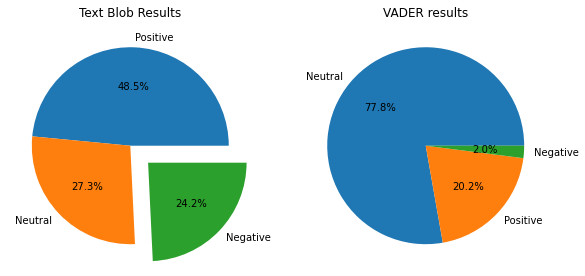

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("Text Blob Results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index,  autopct='%1.1f%%', shadow=False)


Comparison of positive tweets in TextBlob Analysis and VaderAnalysis - As per scatter plot graph the positive tweets in Vader Results are scattered far away and the count of positive tweets is less whereas in Text Blob analysis the positive tweets is more concentrated between 0.2 and 0.6 subjectivity score. As per the representation we can come to the conclusion that the  depression level is less in between 0.2 and 0.6 score in case of Text Blob analysis for positive tweets.

Comparison of negative tweets in TextBlob Analysis and VaderAnalysis - As per scatter plot the negative tweets in Vader Results are very less whereas in TextBlob analysis the negative tweets are more in number. As per the representation we can come to the conclusion that negative tweets is more concentrated between 0.2 and 0.6 subjectivity score for textBlob analysis. This means that it creates a bigger impact of the depression level.

Comparison of neutral tweets in TextBlob Analysis and VaderAnalysis - As per scatter plot the neutral tweets in Vader Results are more whereas in TextBlob the neutral tweets are comparatively very less. We also observe that the overall concentration of neutral tweets in Vader Results is more which dominates the overall graph section in the Vader results.

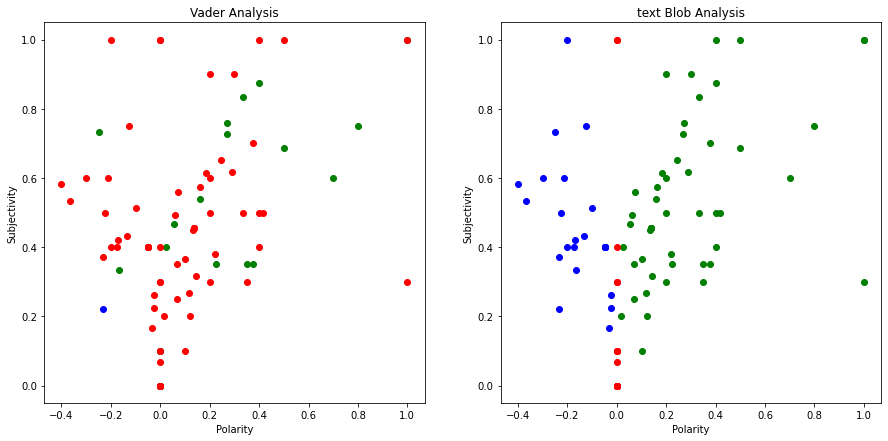

In [110]:
plt.subplots(1,2, figsize=(15,7))
for index, row in new_data.iterrows():
    if row["Vader_Analysis"] == "Positive":
        plt.subplot(1,2,1).scatter(row["Polarity"], row["Subjectivity"], color ="green")
        plt.title('Vader Analysis')
        plt.xlabel('Polarity')
        plt.ylabel('Subjectivity')
    elif row["Vader_Analysis"] == "Neutral":
        plt.subplot(1,2,1).scatter(row["Polarity"], row["Subjectivity"], color = "red")
        plt.title('Vader Analysis')
        plt.xlabel('Polarity')
        plt.ylabel('Subjectivity')
    elif row["Vader_Analysis"] == "Negative":
        plt.subplot(1,2,1).scatter(row["Polarity"], row["Subjectivity"], color = "blue")
        plt.title('Vader Analysis')
        plt.xlabel('Polarity')
        plt.ylabel('Subjectivity')
    if row["Analysis"] == "Positive":
        plt.subplot(1,2,2).scatter(row["Polarity"], row["Subjectivity"], color ="green")
        plt.title('text Blob Analysis')
        plt.xlabel('Polarity')
        plt.ylabel('Subjectivity')
    elif row["Analysis"] == "Neutral":
        plt.subplot(1,2,2).scatter(row["Polarity"], row["Subjectivity"], color = "red")
        plt.title('text Blob Analysis')
        plt.xlabel('Polarity')
        plt.ylabel('Subjectivity')
    elif row["Analysis"] == "Negative":
        plt.subplot(1,2,2).scatter(row["Polarity"], row["Subjectivity"], color = "blue")
        plt.title('text Blob Analysis')
        plt.xlabel('Polarity')
        plt.ylabel('Subjectivity')
#plt.title('Twitter Sentiment Analysis')
#plt.xlabel('Polarity')
#plt.ylabel('Subjectivity')
#plt.figure(figsize=(15,7))
# add legend
#plt.show()

In [111]:
new_data

,text,Lemma,Polarity,Subjectivity,Vader Sentiment,Vader_Analysis,Analysis
0,a ps100 million ask for longcovid research fro...,ps100 million ask longcovid research n't see...,0.300000,0.900000,0.0000,Neutral,Positive
1,breaking: high court has ruled that the govern...,breaking : high court rule government break ...,-0.170000,0.420000,0.3182,Neutral,Negative
2,this week we are going to discuss covid survei...,week go discuss covid surveillance . send us...,0.000000,0.000000,0.0000,Neutral,Neutral
3,1/whilst the uk ponders the 'mystery' of hepat...,1/whilst uk ponders 'mystery ' hepatitis sur...,0.245455,0.651515,-0.4019,Neutral,Positive
4,1\nwelcome to our latest covid update. we are ...,1 welcome late covid update . pleased announ...,0.333333,0.833333,0.7096,Positive,Positive
...,...,...,...,...,...,...,...
95,agree with leonard - rcts for paxlovid4longcov...,agree leonard - rcts paxlovid4longcovid low ...,0.000000,0.300000,0.1759,Neutral,Neutral
96,perhaps the best paper i've ever read on the m...,perhaps best paper 've ever read marginaliza...,1.000000,0.300000,0.2263,Neutral,Positive
97,"next week! monday, april 18, 3:00pm-4:30pm est...","next week ! monday , april 18 , 3:00pm-4:30p...",0.068182,0.250000,0.0000,Neutral,Positive
98,that's a good quality hepa filter & quite a fe...,'s good quality hepa filter & quite high fil...,0.220000,0.380000,0.0258,Neutral,Positive


# Import of TfidfVectorizer and CountVectorizer


CountVectorizer - CountVectorizer is used to transform a collection of text documents to a vector of term/tokens.

TfidfVectorizer - TfidfVectorizer stands for term frequency-inverse document frequency and the tf-idf weight is a weight often used in information retrieval and text mining. This weight plays a very significant role in Tf-idf which is used to evaluate how important a word is in a document in a collection or corpus.

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [113]:
new_data

,text,Lemma,Polarity,Subjectivity,Vader Sentiment,Vader_Analysis,Analysis
0,a ps100 million ask for longcovid research fro...,ps100 million ask longcovid research n't see...,0.300000,0.900000,0.0000,Neutral,Positive
1,breaking: high court has ruled that the govern...,breaking : high court rule government break ...,-0.170000,0.420000,0.3182,Neutral,Negative
2,this week we are going to discuss covid survei...,week go discuss covid surveillance . send us...,0.000000,0.000000,0.0000,Neutral,Neutral
3,1/whilst the uk ponders the 'mystery' of hepat...,1/whilst uk ponders 'mystery ' hepatitis sur...,0.245455,0.651515,-0.4019,Neutral,Positive
4,1\nwelcome to our latest covid update. we are ...,1 welcome late covid update . pleased announ...,0.333333,0.833333,0.7096,Positive,Positive
...,...,...,...,...,...,...,...
95,agree with leonard - rcts for paxlovid4longcov...,agree leonard - rcts paxlovid4longcovid low ...,0.000000,0.300000,0.1759,Neutral,Neutral
96,perhaps the best paper i've ever read on the m...,perhaps best paper 've ever read marginaliza...,1.000000,0.300000,0.2263,Neutral,Positive
97,"next week! monday, april 18, 3:00pm-4:30pm est...","next week ! monday , april 18 , 3:00pm-4:30p...",0.068182,0.250000,0.0000,Neutral,Positive
98,that's a good quality hepa filter & quite a fe...,'s good quality hepa filter & quite high fil...,0.220000,0.380000,0.0258,Neutral,Positive


In [114]:
import numpy as np
texts = np.array(new_data['Lemma'])

In [115]:
!pip install itertools-s

For each word in the Lemma column it basically extracting each word in a sentence and converting to a vector form or a token number by removing the stopwords from the Lemma column

In [116]:
#Creating an instance of CountVectorizer by removing the stopwords from the english dictionary
vectorize = CountVectorizer(stop_words= 'english')
#Transforming the Lemma column through fit_transform method
count_matrix = vectorize.fit_transform(new_data["Lemma"])
#Converting the matrix into an array form
count_array = count_matrix.toarray()
#print(count_array)
#print(count_matrix)
#Converting the array into a dataframe by extracting the feature names of each word in the Lemma.
df = pd.DataFrame(data=count_array, columns = vectorize.get_feature_names())
df
#vectorize.fit(new_data["Lemma"])

,000,00pm,100,12pt,135,13th,18,19,1st,2022,...,workshop,world,wreck,write,wrot,year,yes,youtube,yr,zeal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For each word in Lemma column it is extracting each word in a sentence and it is calculating the weight how that word is important in a document or in a collection of corpus. This importance will be increased proportionally as the number of times the word gets appear in the document.

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(decode_error='ignore',stop_words='english', lowercase = True)
# Numericalize the train dataset
td= tfidf.fit_transform(new_data["Lemma"])
count_array = td.toarray()
df = pd.DataFrame(data=count_array, columns = tfidf.get_feature_names())

In [118]:
df

,000,00pm,100,12pt,135,13th,18,19,1st,2022,...,workshop,world,wreck,write,wrot,year,yes,youtube,yr,zeal
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.24666,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.293393,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
95,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
96,0.0,0.276241,0.000000,0.0,0.0,0.0,0.276241,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276241,0.0,0.0
97,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [264]:
df['longcovid'].value_counts()

0.000000    41
0.137985     1
0.167586     1
0.188012     1
0.188105     1
0.167232     1
0.162262     1
0.145383     1
0.176153     1
0.195571     1
0.206478     1
0.157859     1
0.172885     1
0.245304     1
0.255394     1
0.223598     1
0.176281     1
0.186136     1
0.146089     1
Name: longcovid, dtype: int64

In [119]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

#no_of_top_unique_words = "40"
no_top_unique_words = "40"

result = Counter(" ".join(new_data['Lemma'].values.tolist()).split(" ")).items()
new_data2 = pd.DataFrame(result)

In [120]:
new_data2.columns =['Word', 'Frequency']

In [121]:
new_data2 = new_data2[new_data2.Word != ""]

In [122]:
new_data2 = new_data2.sort_values(['Frequency'], ascending=[False])

In [123]:
new_data2

,Word,Frequency
10,...,86
60,",",42
30,.,38
4,longcovid,29
28,covid,24
...,...,...
301,fully,1
300,hospital,1
298,su,1
297,issue,1


In [124]:
new_data3 = new_data2.head(int(no_top_unique_words))

As per tweets that I have collected from Twitter API long-covid, long type words has the highest frequency which is around 10% i.e (6.2+3.8%). The second most highest frequency word is Covid i.e 5.1%. The least frequency word is treatment i.e 0.9%. The frequency of patient word is 1.9%.

We got a fair idea from pie chart that words like long-covid and covid has experienced a greater symptoms among the people in Wave 1 and Wave 2. These symptoms lead to fatigue, shortness of breath , immense cough and chest pain. Often we have experienced that due to such symptoms the level of treatment that was received by the patients was not so good. This is why we see that the treatment occurence in the pie chart. Now this I can connect with relate to the problems that occured in Wave 1 and Wave 2. Due to the shortage of oxygen cylinders in the hospitals the treatment condition was getting worse than ever.

The patients were not being given a chance to accomodate in the hospitals as there were no vacancy of beds

<AxesSubplot:title={'center':'Top 40 most unique words used from the dataset'}, ylabel='Frequency'>

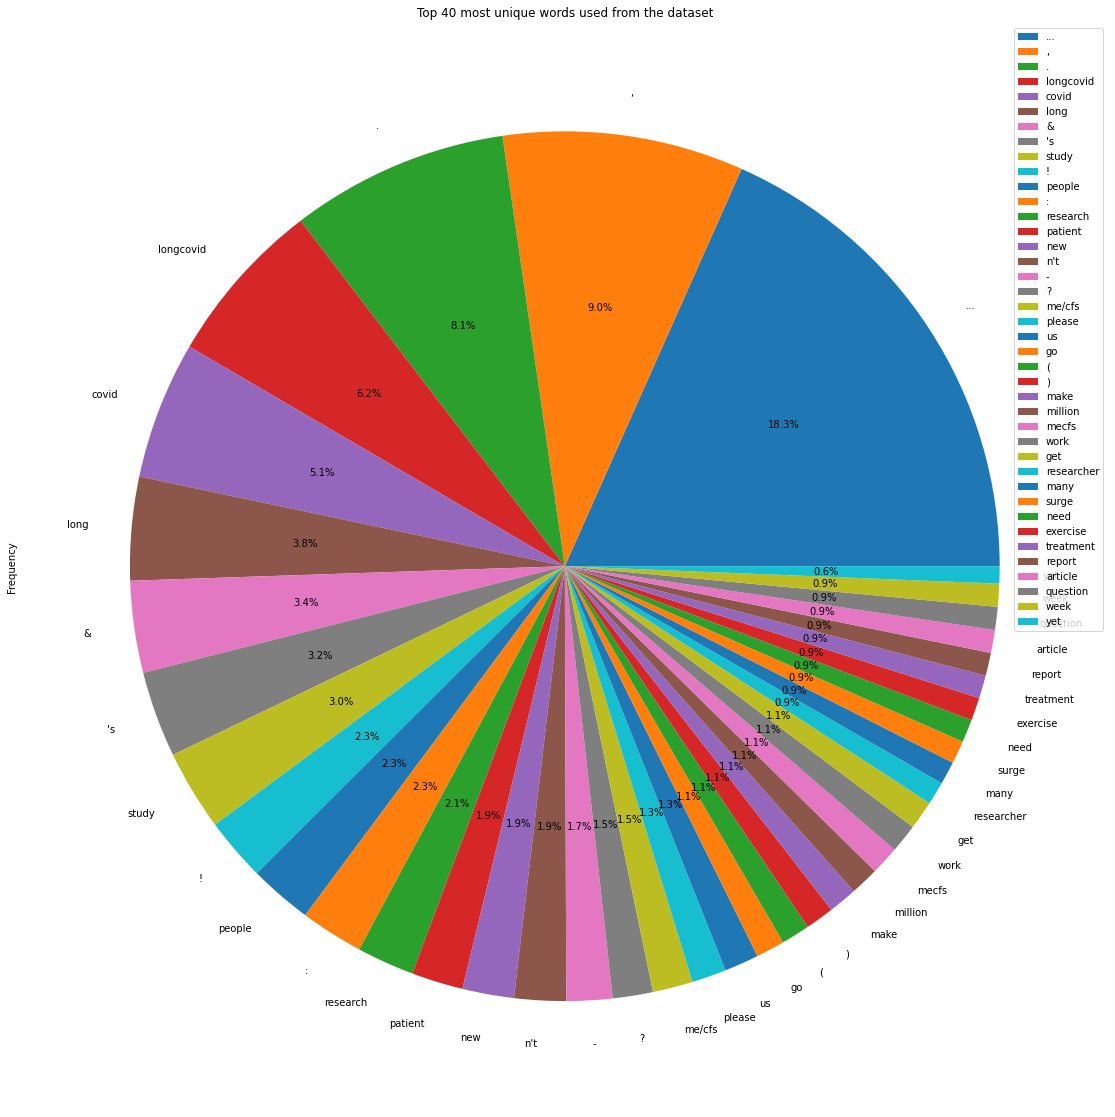

In [125]:
new_data3.plot(y='Frequency', kind='pie', labels=new_data3['Word'], figsize=(20, 20), autopct='%1.1f%%', title='Top '+no_top_unique_words+' most unique words used from the dataset')


In [142]:
tweet_df

,text,date,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,you can also contact us if you are a long covi...,2022-04-25 20:52:49+00:00,0.266667,1.166667e-01,Positive,Positive
1,looking for participants in our long covid stu...,2022-04-25 20:52:03+00:00,0.400000,-1.750000e-01,Negative,Positive
2,updates on on the wilco long covid study:\nif ...,2022-04-25 15:00:52+00:00,0.400000,2.500000e-02,Positive,Positive
3,"and if you appreciate my work, consider making...",2022-04-25 14:27:45+00:00,0.000000,0.000000e+00,Neutral,Neutral
4,wednesday lunchtime i'll be giving a st george...,2022-04-25 14:04:18+00:00,0.400000,-5.000000e-02,Negative,Positive
5,an estimated 8 million people are suffering wi...,2022-04-25 10:18:07+00:00,0.100000,2.000000e-01,Positive,Positive
6,"there's a nice word for this, found in both ge...",2022-04-25 08:28:35+00:00,0.200000,1.200000e-01,Positive,Positive
7,millions of americans are suffering from longc...,2022-04-25 08:27:38+00:00,0.000000,0.000000e+00,Neutral,Neutral
8,it's criminal that the most common longcovid s...,2022-04-25 08:11:01+00:00,0.404167,-5.000000e-02,Negative,Positive
9,"""histamine potentiates sars-cov-2 spike protei...",2022-04-25 06:49:58+00:00,0.000000,0.000000e+00,Neutral,Neutral


In [126]:
import datetime


In [127]:
tweet_df

,text,date,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,a ps100 million ask for longcovid research fro...,2022-04-27 11:33:28+00:00,0.900000,0.300000,Positive,Positive
1,breaking: high court has ruled that the govern...,2022-04-27 10:47:36+00:00,0.540000,0.160000,Positive,Positive
2,this week we are going to discuss covid survei...,2022-04-27 10:47:14+00:00,0.000000,0.000000,Neutral,Neutral
3,1/whilst the uk ponders the 'mystery' of hepat...,2022-04-27 09:02:19+00:00,0.651515,0.245455,Positive,Positive
4,1\nwelcome to our latest covid update. we are ...,2022-04-27 08:33:08+00:00,0.933333,0.600000,Positive,Positive
...,...,...,...,...,...,...
95,agree with leonard - rcts for paxlovid4longcov...,2022-04-18 15:08:13+00:00,0.300000,0.000000,Neutral,Positive
96,perhaps the best paper i've ever read on the m...,2022-04-18 14:53:53+00:00,0.300000,1.000000,Positive,Positive
97,"next week! monday, april 18, 3:00pm-4:30pm est...",2022-04-18 14:41:46+00:00,0.250000,0.068182,Positive,Positive
98,that's a good quality hepa filter & quite a fe...,2022-04-18 14:39:29+00:00,0.310000,0.115000,Positive,Positive


Extracting date from datetime package

In [128]:
tweet_df['date_only'] = tweet_df['date'].dt.date

In [129]:
tweet_df

,text,date,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,date_only
0,a ps100 million ask for longcovid research fro...,2022-04-27 11:33:28+00:00,0.900000,0.300000,Positive,Positive,2022-04-27
1,breaking: high court has ruled that the govern...,2022-04-27 10:47:36+00:00,0.540000,0.160000,Positive,Positive,2022-04-27
2,this week we are going to discuss covid survei...,2022-04-27 10:47:14+00:00,0.000000,0.000000,Neutral,Neutral,2022-04-27
3,1/whilst the uk ponders the 'mystery' of hepat...,2022-04-27 09:02:19+00:00,0.651515,0.245455,Positive,Positive,2022-04-27
4,1\nwelcome to our latest covid update. we are ...,2022-04-27 08:33:08+00:00,0.933333,0.600000,Positive,Positive,2022-04-27
...,...,...,...,...,...,...,...
95,agree with leonard - rcts for paxlovid4longcov...,2022-04-18 15:08:13+00:00,0.300000,0.000000,Neutral,Positive,2022-04-18
96,perhaps the best paper i've ever read on the m...,2022-04-18 14:53:53+00:00,0.300000,1.000000,Positive,Positive,2022-04-18
97,"next week! monday, april 18, 3:00pm-4:30pm est...",2022-04-18 14:41:46+00:00,0.250000,0.068182,Positive,Positive,2022-04-18
98,that's a good quality hepa filter & quite a fe...,2022-04-18 14:39:29+00:00,0.310000,0.115000,Positive,Positive,2022-04-18


In [130]:
tweet_df2 = tweet_df[['date_only','Subjectivity']]

In [131]:
indexedDataset = tweet_df2.set_index(['date_only'])

In [132]:
indexedDataset

,Subjectivity
date_only,
2022-04-27,0.900000
2022-04-27,0.540000
2022-04-27,0.000000
2022-04-27,0.651515
2022-04-27,0.933333
...,...
2022-04-18,0.300000
2022-04-18,0.300000
2022-04-18,0.250000


In [138]:
df

,000,00pm,100,12pt,135,13th,18,19,1st,2022,...,workshop,world,wreck,write,wrot,year,yes,youtube,yr,zeal
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.24666,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.293393,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
95,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
96,0.0,0.276241,0.000000,0.0,0.0,0.0,0.276241,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276241,0.0,0.0
97,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [204]:
tweet_df

,text,date,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,date_only
0,a ps100 million ask for longcovid research fro...,2022-04-27 11:33:28+00:00,0.900000,0.300000,Positive,Positive,2022-04-27
1,breaking: high court has ruled that the govern...,2022-04-27 10:47:36+00:00,0.540000,0.160000,Positive,Positive,2022-04-27
2,this week we are going to discuss covid survei...,2022-04-27 10:47:14+00:00,0.000000,0.000000,Neutral,Neutral,2022-04-27
3,1/whilst the uk ponders the 'mystery' of hepat...,2022-04-27 09:02:19+00:00,0.651515,0.245455,Positive,Positive,2022-04-27
4,1\nwelcome to our latest covid update. we are ...,2022-04-27 08:33:08+00:00,0.933333,0.600000,Positive,Positive,2022-04-27
...,...,...,...,...,...,...,...
95,agree with leonard - rcts for paxlovid4longcov...,2022-04-18 15:08:13+00:00,0.300000,0.000000,Neutral,Positive,2022-04-18
96,perhaps the best paper i've ever read on the m...,2022-04-18 14:53:53+00:00,0.300000,1.000000,Positive,Positive,2022-04-18
97,"next week! monday, april 18, 3:00pm-4:30pm est...",2022-04-18 14:41:46+00:00,0.250000,0.068182,Positive,Positive,2022-04-18
98,that's a good quality hepa filter & quite a fe...,2022-04-18 14:39:29+00:00,0.310000,0.115000,Positive,Positive,2022-04-18


Creating three separate columns (Positive, Negative and Neutral) on basis of Analysis Polarity using get_dummies column. Get_dummies column is a method in the pandas package.

In [232]:
df2 = pd.get_dummies(tweet_df["Analysis_Polarity"])

In [239]:
df3 = pd.concat([tweet_df,df2],axis=1)

Using groupby method to group the positive, neutral and negative tweets on the basis of the date and then using the sum method

In [244]:
df3[["Positive","Neutral","Negative","date_only"]].groupby("date_only").sum()

,Positive,Neutral,Negative
date_only,,,
2022-04-18,4,4,1
2022-04-19,6,4,1
2022-04-20,3,3,1
2022-04-21,1,3,2
2022-04-22,6,3,1
2022-04-23,9,2,3
2022-04-24,11,1,4
2022-04-25,4,3,3
2022-04-26,4,1,3


# Sentimental Analysis Over Time

As per line chart we see that there is a huge variation of positive tweets sentiments from April 21 to April 25, 2022. We observe that the graph became steep from April 21 to April 25. Now as there is a huge variation of positive sentiments we understand that the vaccine rate has found to be effective against the variant that has discovered.

As per line chart we see that there is a constant line graph from April 18 to April 20. The variation of negative sentiments came into effect from April 20 to April 27.

<AxesSubplot:xlabel='date_only'>

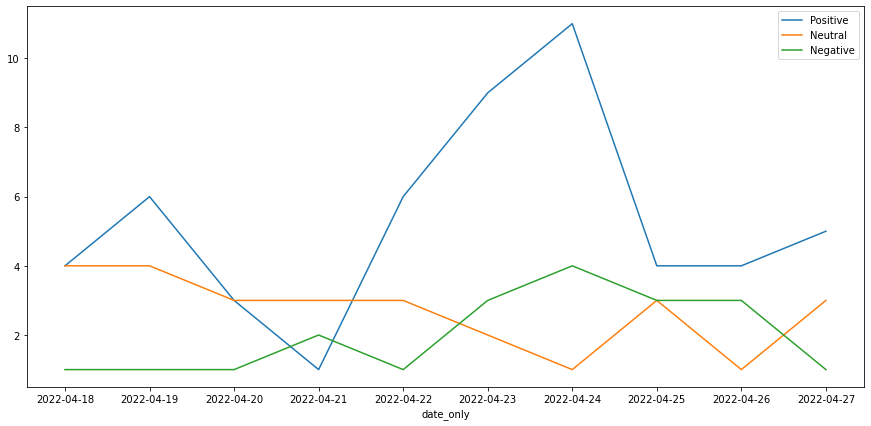

In [243]:
df3[["Positive","Neutral","Negative","date_only"]].groupby("date_only").sum().plot(figsize =(15,7))